In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"./Cleaned_dataset.csv"
df = pd.read_csv(file)

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    452088 non-null  datetime64[ns]
 1   Journey_day        452088 non-null  object        
 2   Airline            452088 non-null  object        
 3   Flight_code        452088 non-null  object        
 4   Class              452088 non-null  object        
 5   Source             452088 non-null  object        
 6   Departure          452088 non-null  object        
 7   Total_stops        452088 non-null  object        
 8   Arrival            452088 non-null  object        
 9   Destination        452088 non-null  object        
 10  Duration_in_hours  452088 non-null  float64       
 11  Days_left          452088 non-null  int64         
 12  Fare               452088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), 

In [3]:
df = df.dropna()
df.drop_duplicates( keep=False, inplace=True)
df = df.reset_index(drop = True)
df.shape

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encode = LabelEncoder()
ohencode = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [5]:
# One Hot encoding the rest of the categorical data
for col in ["Journey_day", "Airline","Class", "Source", "Departure", "Total_stops", "Arrival", "Destination"]:
    ohetransform = ohencode.fit_transform(df[[col]])
    df = pd.concat([df, ohetransform], axis=1).drop(columns=[col])

# Label Encoding Flight_code
df.Flight_code = encode.fit_transform(df.Flight_code)

In [6]:
print(df.shape)
df.head()

(440087, 50)


,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Fare,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,...,Arrival_6 AM - 12 PM,Arrival_After 6 PM,Arrival_Before 6 AM,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,2023-01-16,1209,2.0833,1,5335,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2023-01-16,164,2.3333,1,5899,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2023-01-16,942,2.1667,1,5801,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2023-01-16,1224,2.0833,1,5794,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2023-01-16,852,2.1667,1,5955,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440087 entries, 0 to 440086
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date_of_journey         440087 non-null  datetime64[ns]
 1   Flight_code             440087 non-null  int64         
 2   Duration_in_hours       440087 non-null  float64       
 3   Days_left               440087 non-null  int64         
 4   Fare                    440087 non-null  int64         
 5   Journey_day_Friday      440087 non-null  float64       
 6   Journey_day_Monday      440087 non-null  float64       
 7   Journey_day_Saturday    440087 non-null  float64       
 8   Journey_day_Sunday      440087 non-null  float64       
 9   Journey_day_Thursday    440087 non-null  float64       
 10  Journey_day_Tuesday     440087 non-null  float64       
 11  Journey_day_Wednesday   440087 non-null  float64       
 12  Airline_Air India       440087

In [8]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=encode.fit_transform(df[col])

<Axes: >

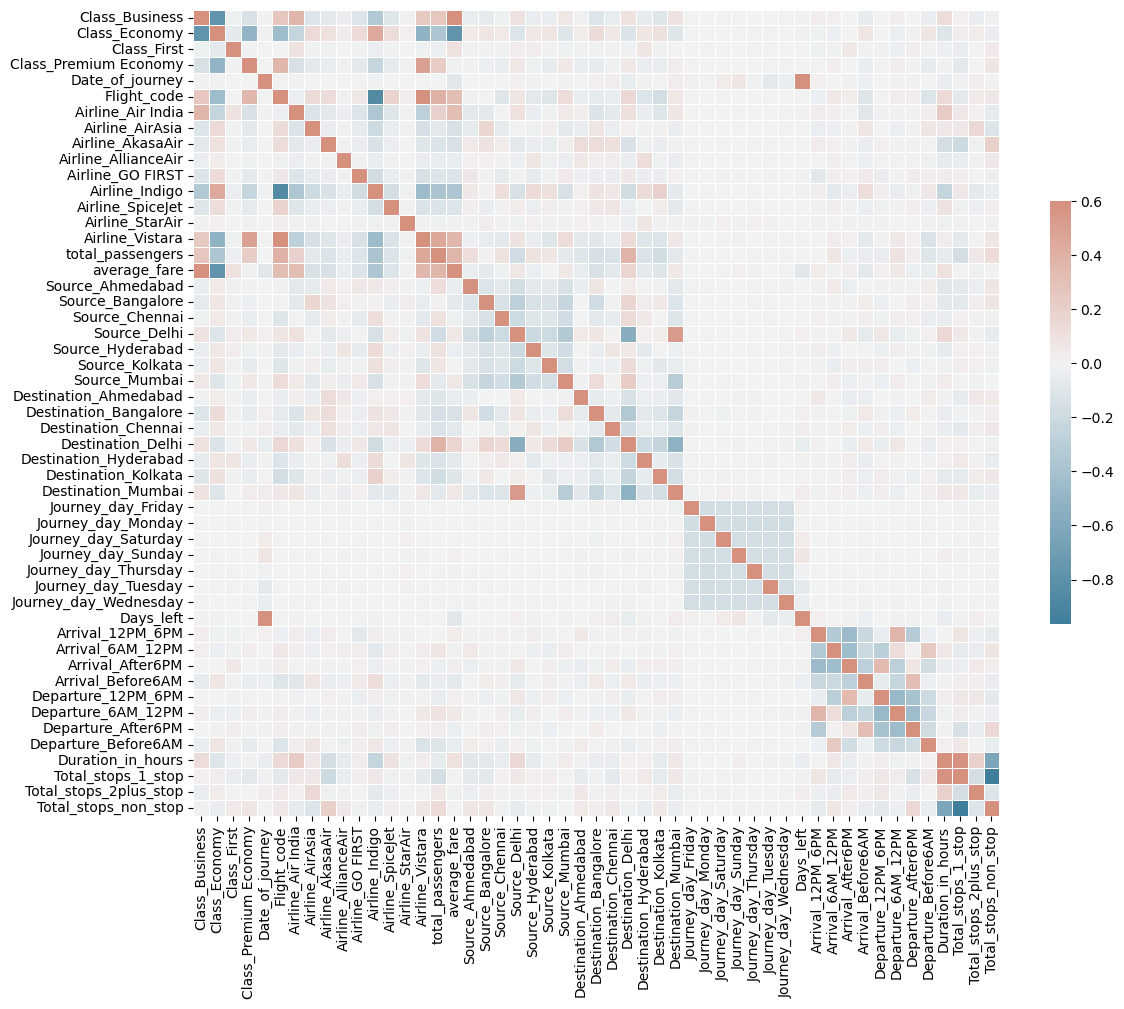

In [9]:
aggregated_df = df.groupby(['Class_Business', 'Class_Economy', 'Class_First',
       'Class_Premium Economy','Date_of_journey', 'Flight_code', 'Airline_Air India',
       'Airline_AirAsia', 'Airline_AkasaAir', 'Airline_AllianceAir',
       'Airline_GO FIRST', 'Airline_Indigo', 'Airline_SpiceJet',
       'Airline_StarAir', 'Airline_Vistara',
       ]).agg(
    total_passengers=('Fare', 'size'),
    average_fare=('Fare', 'mean'),

    Source_Ahmedabad=('Source_Ahmedabad', 'first'),
    Source_Bangalore=('Source_Bangalore', 'first'),
    Source_Chennai=('Source_Chennai', 'first'),
    Source_Delhi=('Source_Delhi', 'first'),
    Source_Hyderabad=('Source_Hyderabad', 'first'),
    Source_Kolkata=('Source_Kolkata', 'first'),
    Source_Mumbai=('Source_Mumbai', 'first'),
    Destination_Ahmedabad=('Destination_Ahmedabad', 'first'),
    Destination_Bangalore=('Destination_Bangalore', 'first'),
    Destination_Chennai=('Destination_Chennai', 'first'),
    Destination_Delhi=('Destination_Delhi', 'first'),
    Destination_Hyderabad=('Destination_Hyderabad', 'first'),
    Destination_Kolkata=('Destination_Kolkata', 'first'),
    Destination_Mumbai=('Destination_Mumbai', 'first'),
    Journey_day_Friday=('Journey_day_Friday', 'first'),
    Journey_day_Monday=('Journey_day_Monday', 'first'),
    Journey_day_Saturday=('Journey_day_Saturday', 'first'),
    Journey_day_Sunday=('Journey_day_Sunday', 'first'),
    Journey_day_Thursday=('Journey_day_Thursday', 'first'),
    Journey_day_Tuesday=('Journey_day_Tuesday', 'first'),
    Journey_day_Wednesday=('Journey_day_Wednesday', 'first'),
    Days_left=('Days_left', 'mean'),
    Arrival_12PM_6PM=('Arrival_12 PM - 6 PM', 'first'),
    Arrival_6AM_12PM=('Arrival_6 AM - 12 PM', 'first'),
    Arrival_After6PM=('Arrival_After 6 PM', 'first'),
    Arrival_Before6AM=('Arrival_Before 6 AM', 'first'),
    Departure_12PM_6PM=('Departure_12 PM - 6 PM', 'first'),
    Departure_6AM_12PM=('Departure_6 AM - 12 PM', 'first'),
    Departure_After6PM=('Departure_After 6 PM', 'first'),
    Departure_Before6AM=('Departure_Before 6 AM', 'first'),
    Duration_in_hours=('Duration_in_hours', 'first'),
    Total_stops_1_stop=('Total_stops_1-stop','first'),
    Total_stops_2plus_stop=('Total_stops_2+-stop','first'),
    Total_stops_non_stop=('Total_stops_non-stop', 'first')
).reset_index()

# Rename columns if necessary
aggregated_df.rename(columns={'Fare': 'average_fare'}, inplace=True)

corr_matrix = aggregated_df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(13, 11))

sns.heatmap(corr_matrix,cmap=cmap,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
aggregated_df.to_csv('passengers_2.csv', index=False)

In [11]:
from sklearn.model_selection import train_test_split

models_dict = {}

aggregated_df.sort_values(by='Date_of_journey')

df['year'] = aggregated_df['Date_of_journey'].dt.year
df['month'] = aggregated_df['Date_of_journey'].dt.month
df['day'] = aggregated_df['Date_of_journey'].dt.day


X=aggregated_df.drop(['total_passengers','Date_of_journey'],axis=1)
y=aggregated_df['total_passengers']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])
X['average_fare'] = minmax.fit_transform(X[['average_fare']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,Class_Business,Class_Economy,Class_First,Class_Premium Economy,Flight_code,Airline_Air India,Airline_AirAsia,Airline_AkasaAir,Airline_AllianceAir,Airline_GO FIRST,...,Arrival_After6PM,Arrival_Before6AM,Departure_12PM_6PM,Departure_6AM_12PM,Departure_After6PM,Departure_Before6AM,Duration_in_hours,Total_stops_1_stop,Total_stops_2plus_stop,Total_stops_non_stop
8456,0.0,1.0,0.0,0.0,1155,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.680541,0.0,0.0,1.0
15872,0.0,1.0,0.0,0.0,582,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-0.478912,1.0,0.0,0.0
32637,0.0,1.0,0.0,0.0,1249,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.855492,0.0,1.0,0.0
25799,0.0,1.0,0.0,0.0,1360,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.990706,0.0,0.0,1.0
63071,0.0,1.0,0.0,0.0,1357,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-0.804600,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,1.0,1395,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-0.835624,0.0,0.0,1.0
54886,0.0,1.0,0.0,0.0,1358,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.354853,1.0,0.0,0.0
76820,1.0,0.0,0.0,0.0,1255,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.323829,1.0,0.0,0.0
860,0.0,0.0,0.0,1.0,1396,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-0.789097,0.0,0.0,1.0


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(criterion='squared_error', random_state=42)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [13]:
score = r2_score(y_preds, y_test)
print (score)

0.9163078454808232


In [14]:
def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

print (MAPE (y_test, y_preds))
RMSE (y_test, y_preds)
models_dict = {}
models_dict['DecisionTreeRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

13.255991271955725


In [15]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=aggregated_df.merge(out,left_index=True,right_index=True)

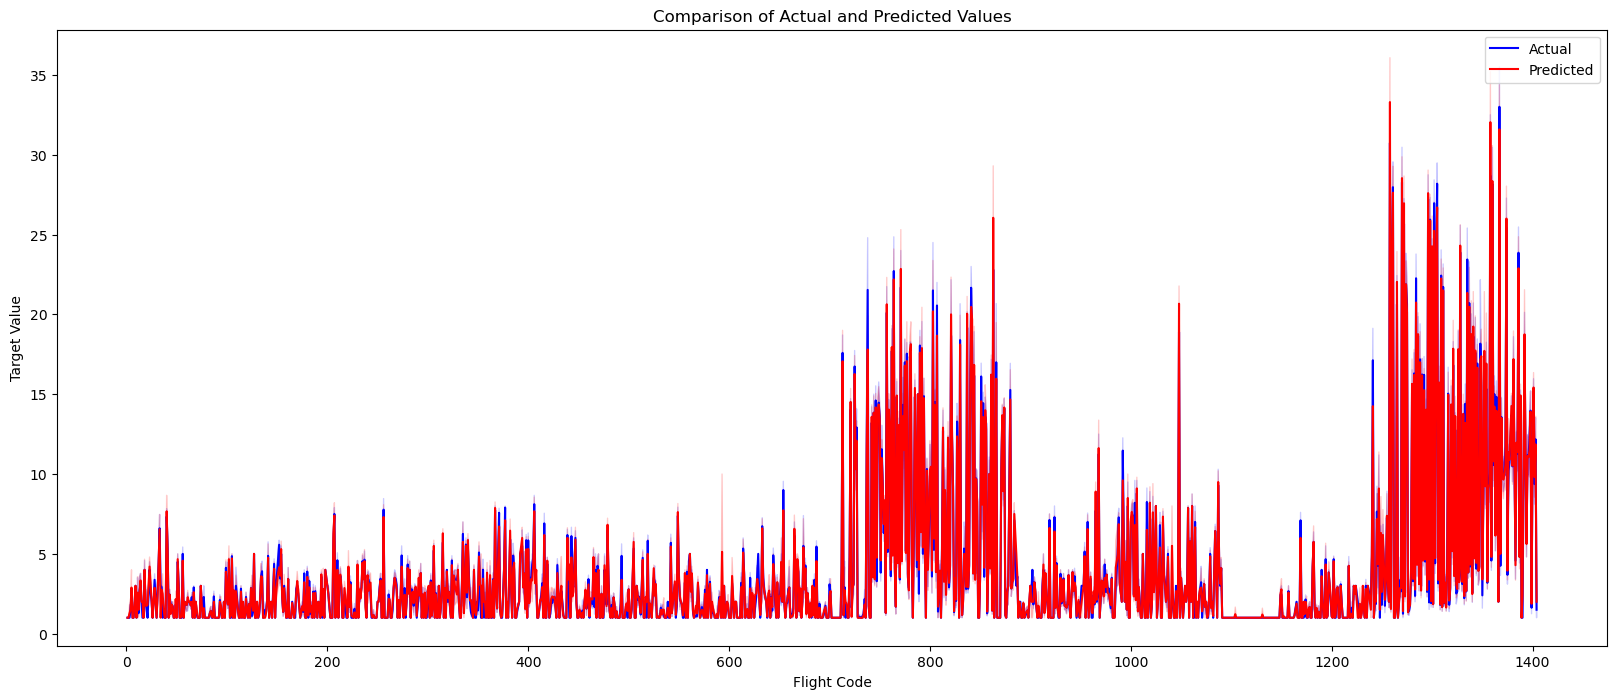

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [18]:
score = r2_score(y_preds, y_test)
print (score)
print(MAPE (y_test, y_preds))

models_dict['RandomForestRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9536730165857407
12.786533169935469


In [19]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=aggregated_df.merge(out,left_index=True,right_index=True)

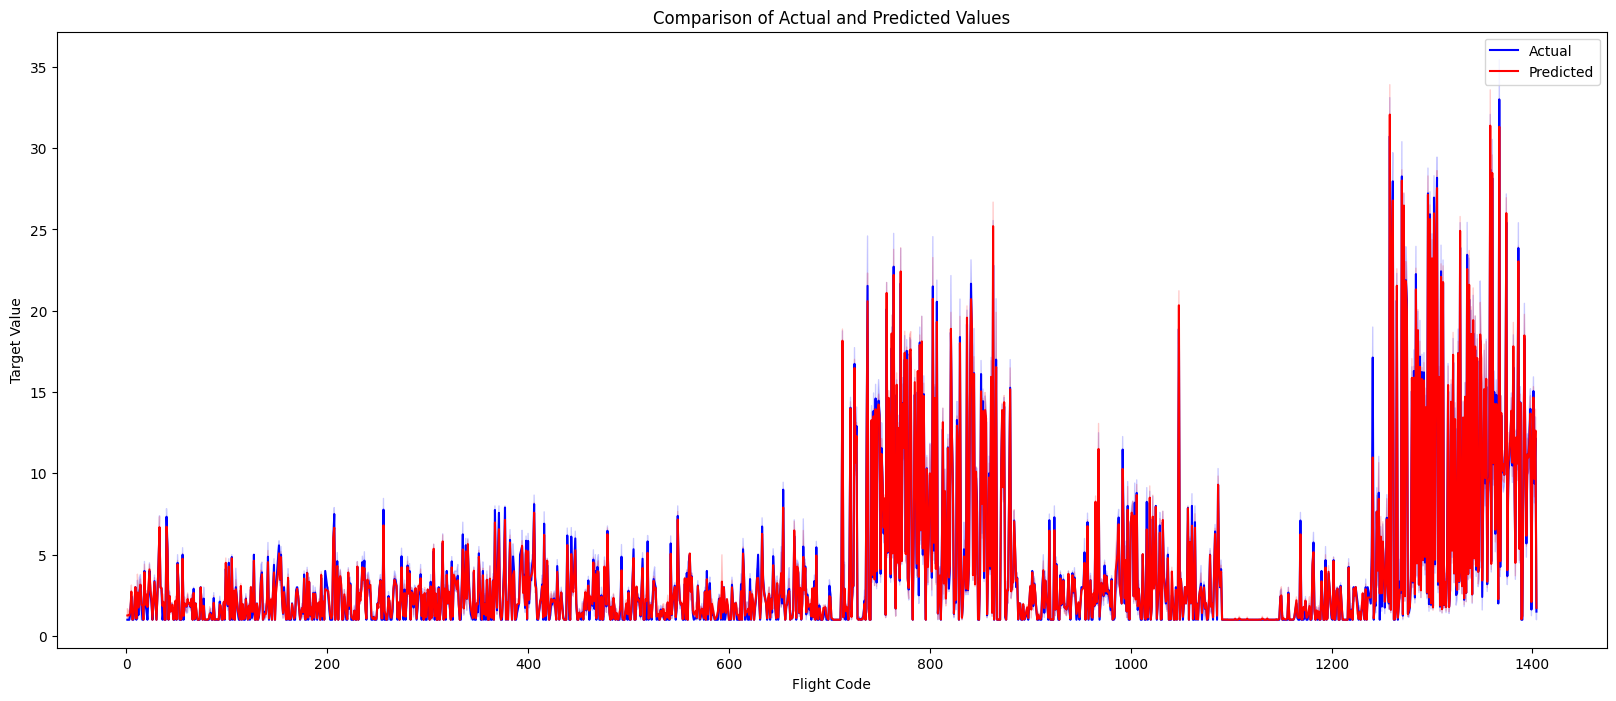

In [20]:
import seaborn as sns

plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [20]:
airline_df = result[result['Airline_Air India']==1]
airline_df = airline_df[airline_df['Class_Economy']==1]

<Figure size 2000x800 with 0 Axes>

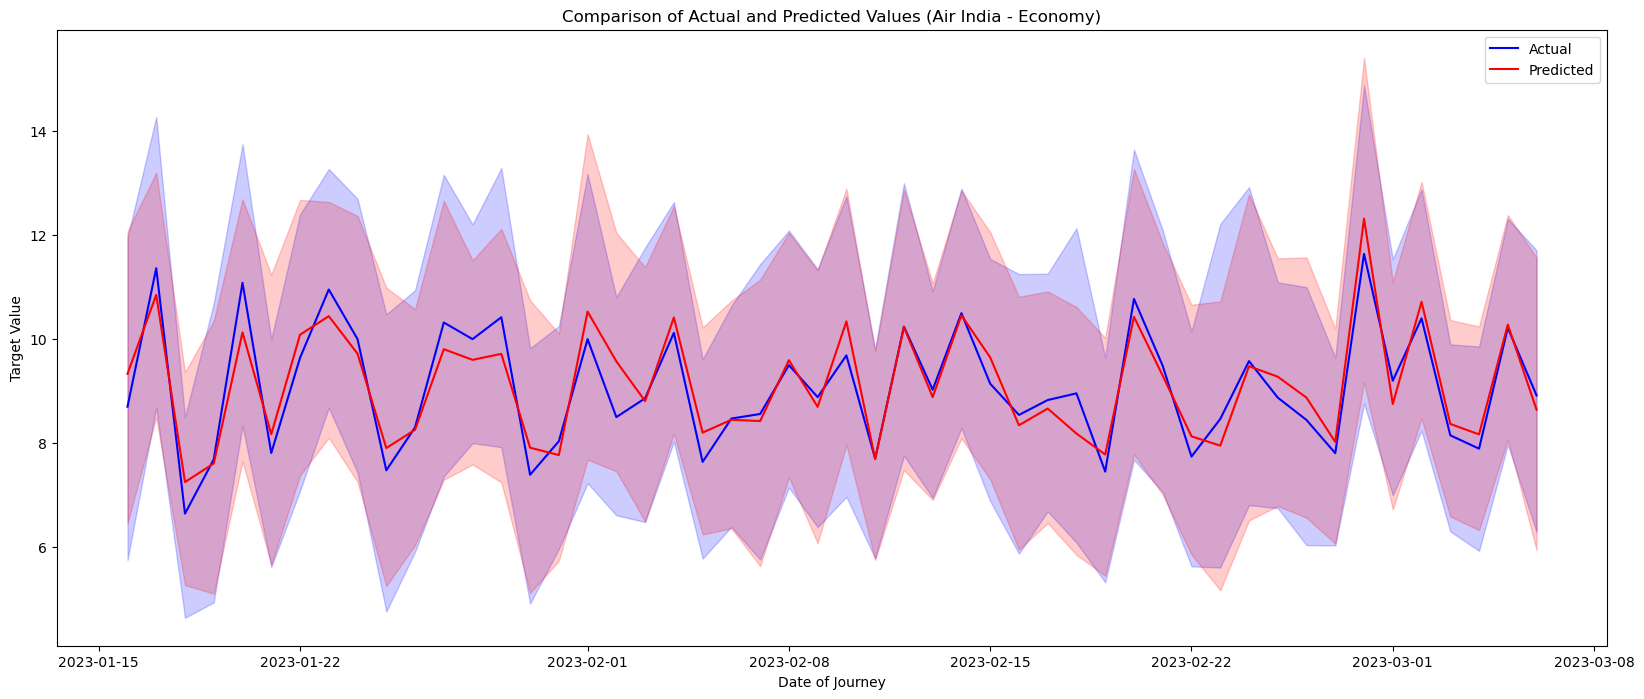

In [21]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))

sns.lineplot(data=airline_df, x='Date_of_journey', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values (Air India - Economy)')
plt.legend()
plt.show()

In [22]:
# !pip install catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.3,
    depth=7,
    loss_function='RMSE',
    random_seed=42
)


In [23]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


0:	learn: 5.3888264	total: 82.3ms	remaining: 1m 22s
1:	learn: 4.4915144	total: 93.9ms	remaining: 46.9s
2:	learn: 3.9304283	total: 103ms	remaining: 34.2s
3:	learn: 3.5804692	total: 113ms	remaining: 28.2s
4:	learn: 3.3515083	total: 123ms	remaining: 24.4s
5:	learn: 3.1919665	total: 131ms	remaining: 21.7s
6:	learn: 3.0832738	total: 145ms	remaining: 20.6s
7:	learn: 3.0272425	total: 154ms	remaining: 19.1s
8:	learn: 2.9402586	total: 165ms	remaining: 18.2s
9:	learn: 2.9002136	total: 175ms	remaining: 17.3s
10:	learn: 2.8620104	total: 188ms	remaining: 16.9s
11:	learn: 2.8119148	total: 202ms	remaining: 16.6s
12:	learn: 2.7409174	total: 215ms	remaining: 16.4s
13:	learn: 2.7152706	total: 227ms	remaining: 16s
14:	learn: 2.6843846	total: 241ms	remaining: 15.9s
15:	learn: 2.6521838	total: 252ms	remaining: 15.5s
16:	learn: 2.6225197	total: 263ms	remaining: 15.2s
17:	learn: 2.5967434	total: 274ms	remaining: 14.9s
18:	learn: 2.5738129	total: 286ms	remaining: 14.8s
19:	learn: 2.5505142	total: 295ms	remain

In [24]:
y_preds.shape
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['CatBoostRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9561045543907828
22.01813779328122


In [25]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=aggregated_df.merge(out,left_index=True,right_index=True)

In [26]:
airline_df = result[result['Flight_code']==1403]
airline_df = airline_df[airline_df['Class_Economy']==1]

<Figure size 2000x800 with 0 Axes>

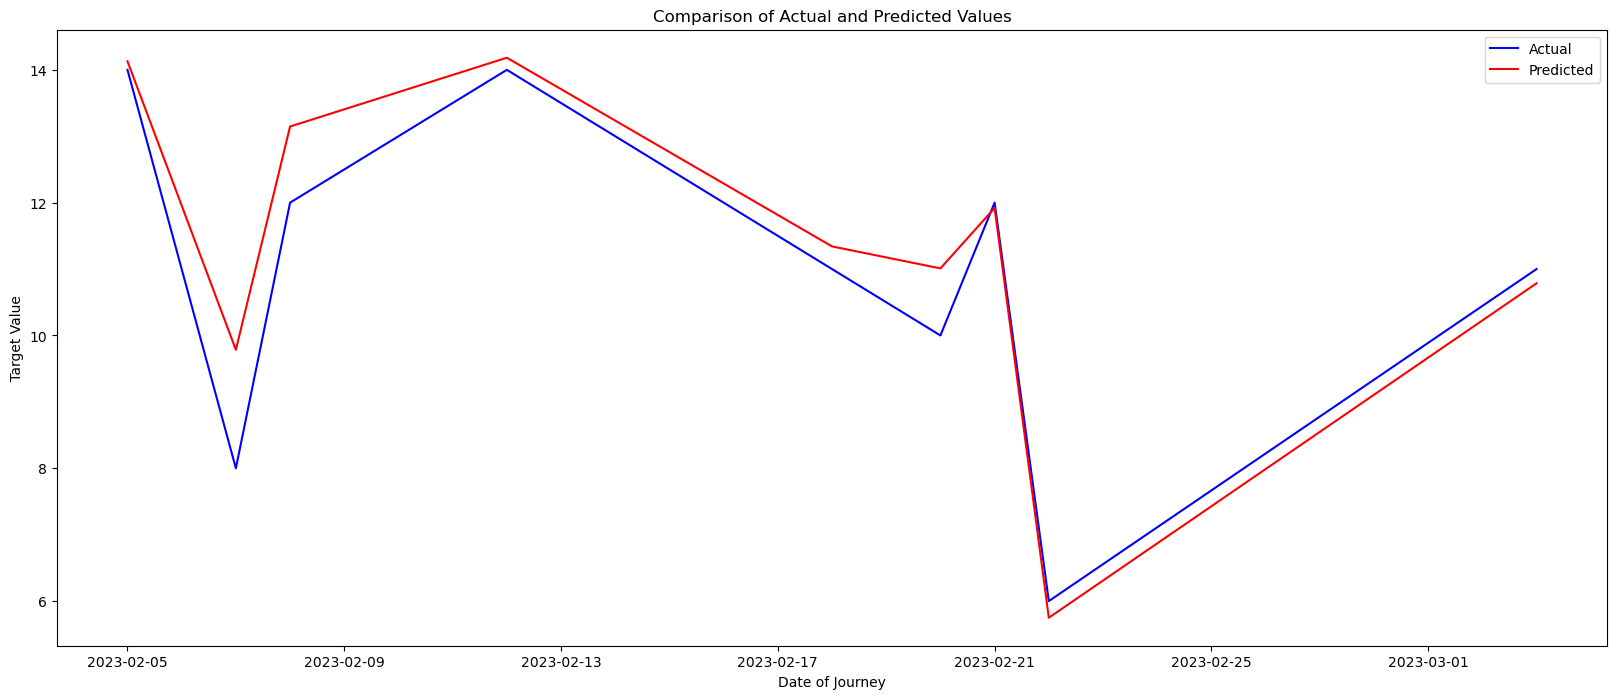

In [27]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [29]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [30]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['BaggingRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9536706280024445
12.813476241405757


In [31]:
out=pd.DataFrame({'Actual_booked':y_test,'Pred_booked':y_preds})
result=aggregated_df.merge(out,left_index=True,right_index=True)

In [32]:
airline_df = result[result['Airline_Air India']==1]
airline_df = airline_df[airline_df['Class_Economy']==1]

<Figure size 2000x800 with 0 Axes>

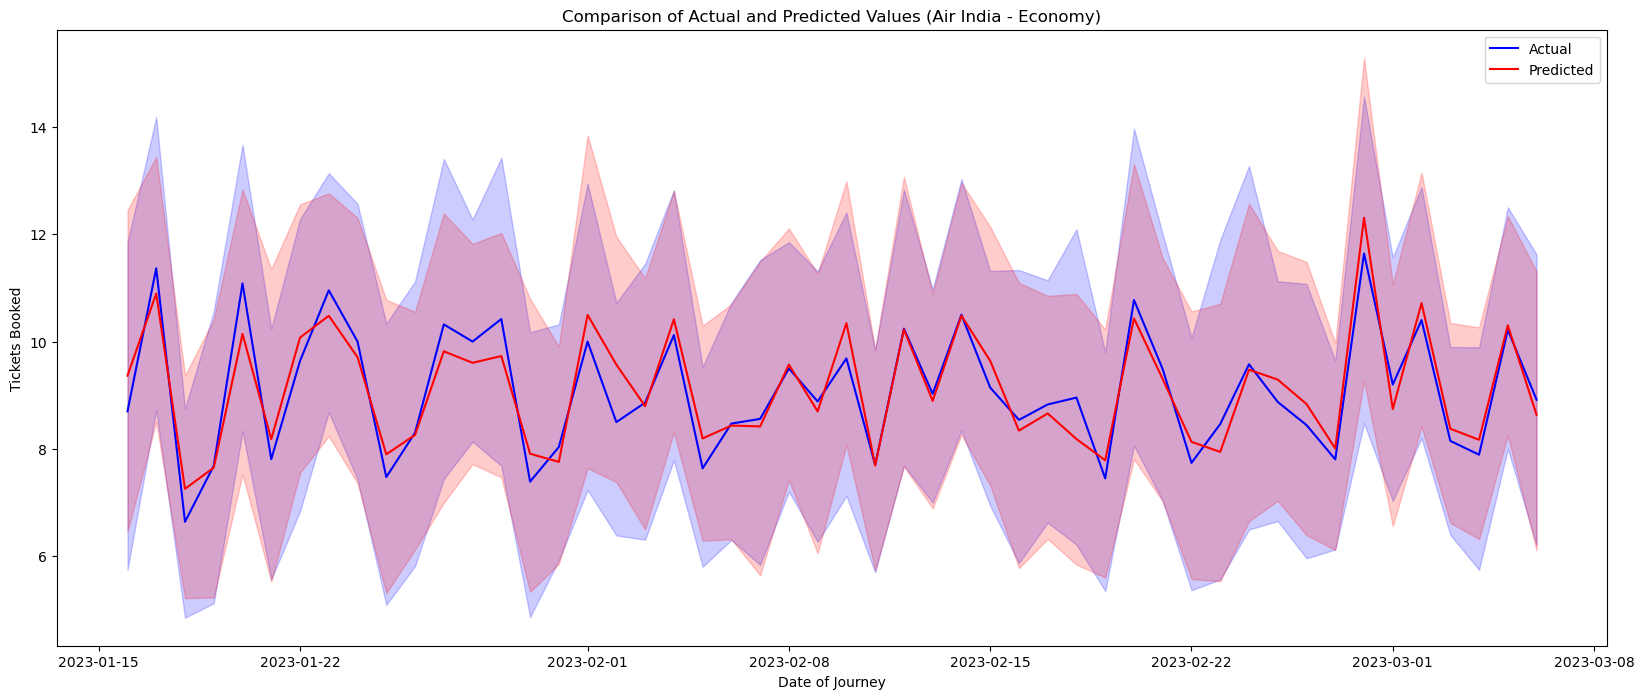

In [33]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
''''''
sns.lineplot(data=airline_df, x='Date_of_journey', y='Actual_booked', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Pred_booked', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Tickets Booked')
plt.title('Comparison of Actual and Predicted Values (Air India - Economy)')
plt.legend()
plt.show()

In [34]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ['Model','R2 Score', 'MAPE', 'RMSE']
models_df

,Model,R2 Score,MAPE,RMSE
DecisionTreeRegressor,DecisionTreeRegressor(random_state=42),0.916308,13.255991,1.964707
RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.953673,12.786533,1.423297
CatBoostRegressor,<catboost.core.CatBoostRegressor object at 0x7...,0.956105,22.018138,1.380364
BaggingRegressor,(DecisionTreeRegressor(random_state=1952926171...,0.953671,12.813476,1.423236
